In [1]:
import pandas as pd 
import numpy as np 
import pyodbc
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [2]:
conn_str = (
    'DRIVER={ODBC Driver 17 for SQL Server};'
    'SERVER=localhost;'
    'DATABASE=INSTANT;'
    'Trusted_Connection=yes;'
)

In [3]:
conn = pyodbc.connect(conn_str)

In [4]:
query = "SELECT * FROM dbo.shopping_trends"
df = pd.read_sql(query, conn)

df 

,Customer_ID,Age,Gender,Item_Purchased,Category,Purchase_Amount_USD,Location,Size,Color,Season,Review_Rating,Subscription_Status,Payment_Method,Shipping_Type,Discount_Applied,Promo_Code_Used,Previous_Purchases,Preferred_Payment_Method,Frequency_of_Purchases
0,1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Credit Card,Express,Yes,Yes,14,Venmo,Fortnightly
1,2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Bank Transfer,Express,Yes,Yes,2,Cash,Fortnightly
2,3,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Cash,Free Shipping,Yes,Yes,23,Credit Card,Weekly
3,4,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Yes,PayPal,Next Day Air,Yes,Yes,49,PayPal,Weekly
4,5,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Yes,Cash,Free Shipping,Yes,Yes,31,PayPal,Annually
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3895,3896,40,Female,Hoodie,Clothing,28,Virginia,L,Turquoise,Summer,4.2,No,Cash,2-Day Shipping,No,No,32,Venmo,Weekly
3896,3897,52,Female,Backpack,Accessories,49,Iowa,L,White,Spring,4.5,No,PayPal,Store Pickup,No,No,41,Bank Transfer,Bi-Weekly
3897,3898,46,Female,Belt,Accessories,33,New Jersey,L,Green,Spring,2.9,No,Credit Card,Standard,No,No,24,Venmo,Quarterly
3898,3899,44,Female,Shoes,Footwear,77,Minnesota,S,Brown,Summer,3.8,No,PayPal,Express,No,No,24,Venmo,Weekly


In [5]:
df.head(5)

,Customer_ID,Age,Gender,Item_Purchased,Category,Purchase_Amount_USD,Location,Size,Color,Season,Review_Rating,Subscription_Status,Payment_Method,Shipping_Type,Discount_Applied,Promo_Code_Used,Previous_Purchases,Preferred_Payment_Method,Frequency_of_Purchases
0,1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Credit Card,Express,Yes,Yes,14,Venmo,Fortnightly
1,2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Bank Transfer,Express,Yes,Yes,2,Cash,Fortnightly
2,3,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Cash,Free Shipping,Yes,Yes,23,Credit Card,Weekly
3,4,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Yes,PayPal,Next Day Air,Yes,Yes,49,PayPal,Weekly
4,5,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Yes,Cash,Free Shipping,Yes,Yes,31,PayPal,Annually


In [6]:
df.tail(5)

,Customer_ID,Age,Gender,Item_Purchased,Category,Purchase_Amount_USD,Location,Size,Color,Season,Review_Rating,Subscription_Status,Payment_Method,Shipping_Type,Discount_Applied,Promo_Code_Used,Previous_Purchases,Preferred_Payment_Method,Frequency_of_Purchases
3895,3896,40,Female,Hoodie,Clothing,28,Virginia,L,Turquoise,Summer,4.2,No,Cash,2-Day Shipping,No,No,32,Venmo,Weekly
3896,3897,52,Female,Backpack,Accessories,49,Iowa,L,White,Spring,4.5,No,PayPal,Store Pickup,No,No,41,Bank Transfer,Bi-Weekly
3897,3898,46,Female,Belt,Accessories,33,New Jersey,L,Green,Spring,2.9,No,Credit Card,Standard,No,No,24,Venmo,Quarterly
3898,3899,44,Female,Shoes,Footwear,77,Minnesota,S,Brown,Summer,3.8,No,PayPal,Express,No,No,24,Venmo,Weekly
3899,3900,52,Female,Handbag,Accessories,81,California,M,Beige,Spring,3.1,No,Bank Transfer,Store Pickup,No,No,33,Venmo,Quarterly


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3900 entries, 0 to 3899
Data columns (total 19 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Customer_ID               3900 non-null   int64  
 1   Age                       3900 non-null   int64  
 2   Gender                    3900 non-null   object 
 3   Item_Purchased            3900 non-null   object 
 4   Category                  3900 non-null   object 
 5   Purchase_Amount_USD       3900 non-null   int64  
 6   Location                  3900 non-null   object 
 7   Size                      3900 non-null   object 
 8   Color                     3900 non-null   object 
 9   Season                    3900 non-null   object 
 10  Review_Rating             3900 non-null   float64
 11  Subscription_Status       3900 non-null   object 
 12  Payment_Method            3900 non-null   object 
 13  Shipping_Type             3900 non-null   object 
 14  Discount

In [8]:
df.describe()

,Customer_ID,Age,Purchase_Amount_USD,Review_Rating,Previous_Purchases
count,3900.000000,3900.000000,3900.000000,3900.000000,3900.000000
mean,1950.500000,44.068462,59.764359,3.749949,25.351538
std,1125.977353,15.207589,23.685392,0.716223,14.447125
min,1.000000,18.000000,20.000000,2.500000,1.000000
25%,975.750000,31.000000,39.000000,3.100000,13.000000
50%,1950.500000,44.000000,60.000000,3.700000,25.000000
75%,2925.250000,57.000000,81.000000,4.400000,38.000000
max,3900.000000,70.000000,100.000000,5.000000,50.000000


In [9]:
df.isnull().sum()

Customer_ID                 0
Age                         0
Gender                      0
Item_Purchased              0
Category                    0
Purchase_Amount_USD         0
Location                    0
Size                        0
Color                       0
Season                      0
Review_Rating               0
Subscription_Status         0
Payment_Method              0
Shipping_Type               0
Discount_Applied            0
Promo_Code_Used             0
Previous_Purchases          0
Preferred_Payment_Method    0
Frequency_of_Purchases      0
dtype: int64

In [10]:
df.duplicated().sum()

np.int64(0)

In [11]:
df.shape

(3900, 19)

In [12]:
df['Gender'].value_counts()

Gender
Male      2652
Female    1248
Name: count, dtype: int64

In [13]:
df['Category'].value_counts()

Category
Clothing       1737
Accessories    1240
Footwear        599
Outerwear       324
Name: count, dtype: int64

In [14]:
df['Payment_Method'].value_counts()

Payment_Method
Credit Card      696
Venmo            653
Cash             648
PayPal           638
Debit Card       633
Bank Transfer    632
Name: count, dtype: int64

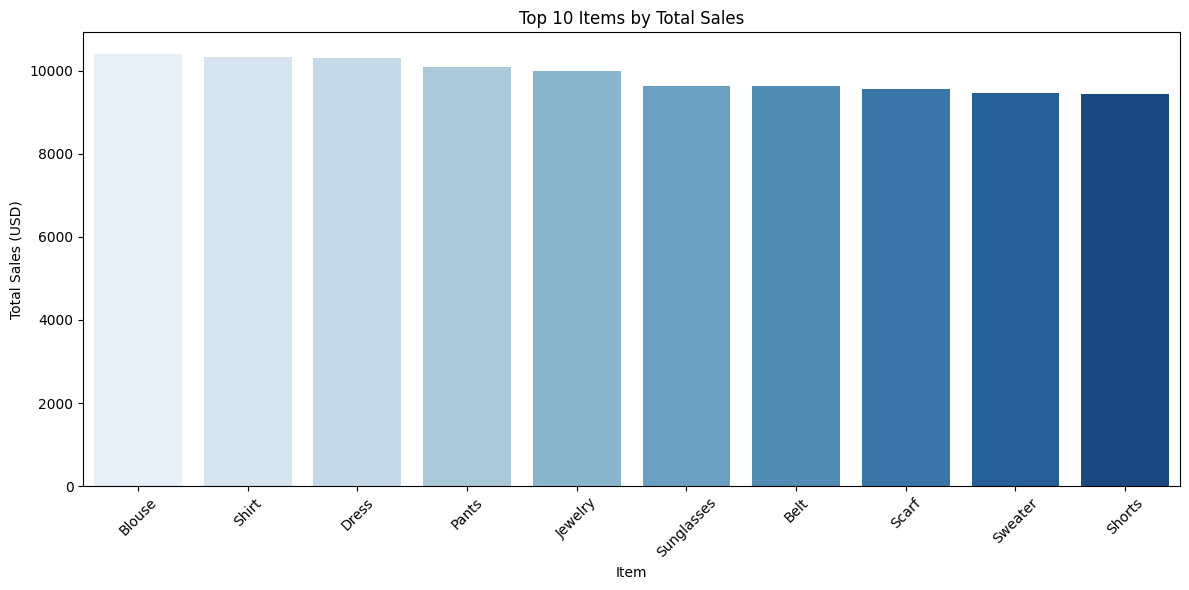

In [15]:
most_sold = df.groupby('Item_Purchased')['Purchase_Amount_USD'].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(12,6))
sns.barplot(x=most_sold.index, y=most_sold.values, palette=sns.color_palette("Blues", len(most_sold)))
plt.title('Top 10 Items by Total Sales')
plt.xlabel('Item')
plt.ylabel('Total Sales (USD)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

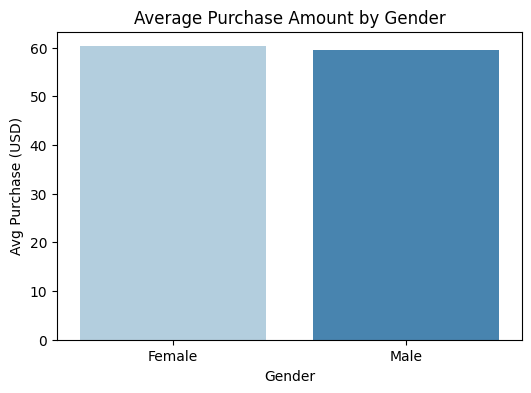

In [16]:
avg_by_gender = df.groupby('Gender')['Purchase_Amount_USD'].mean().reset_index()

plt.figure(figsize=(6,4))
sns.barplot(data=avg_by_gender, x='Gender', y='Purchase_Amount_USD', palette=sns.color_palette("Blues", len(avg_by_gender)))
plt.title('Average Purchase Amount by Gender')
plt.ylabel('Avg Purchase (USD)')
plt.show()

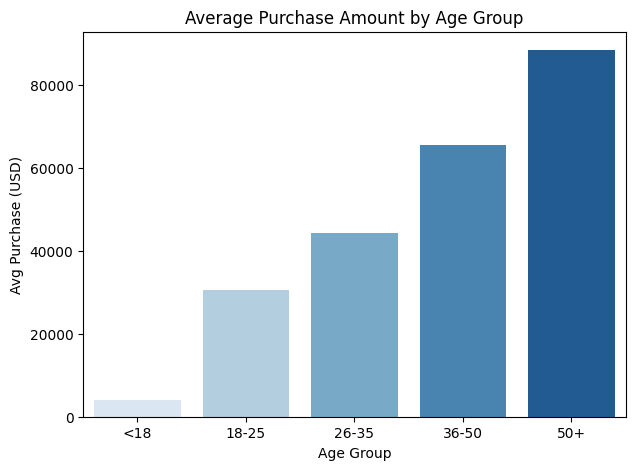

In [17]:
df['Age_Group'] = pd.cut(df['Age'], bins=[0,18,25,35,50,100], labels=['<18', '18-25', '26-35', '36-50', '50+'])
avg_by_age = df.groupby('Age_Group')['Purchase_Amount_USD'].sum().reset_index()

plt.figure(figsize=(7,5))
sns.barplot(data=avg_by_age, x='Age_Group', y='Purchase_Amount_USD', palette=sns.color_palette("Blues", len(avg_by_age)))
plt.title('Average Purchase Amount by Age Group')
plt.ylabel('Avg Purchase (USD)')
plt.xlabel('Age Group')
plt.show()

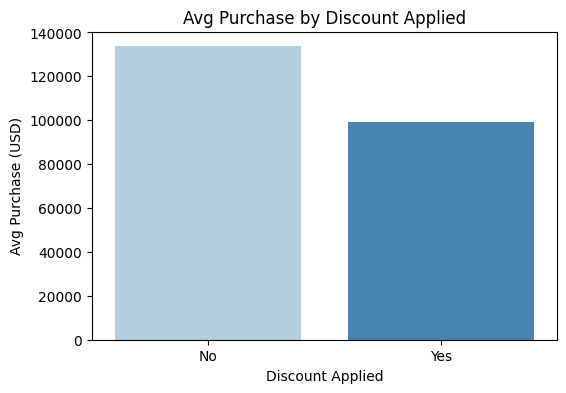

In [18]:
discount_effect = df.groupby('Discount_Applied')['Purchase_Amount_USD'].sum().reset_index()

plt.figure(figsize=(6,4))
sns.barplot(data=discount_effect, x='Discount_Applied', y='Purchase_Amount_USD', palette=sns.color_palette("Blues", len(discount_effect)))
plt.title('Avg Purchase by Discount Applied')
plt.ylabel('Avg Purchase (USD)')
plt.xlabel('Discount Applied')
plt.xticks([0, 1], ['No', 'Yes'])
plt.show()

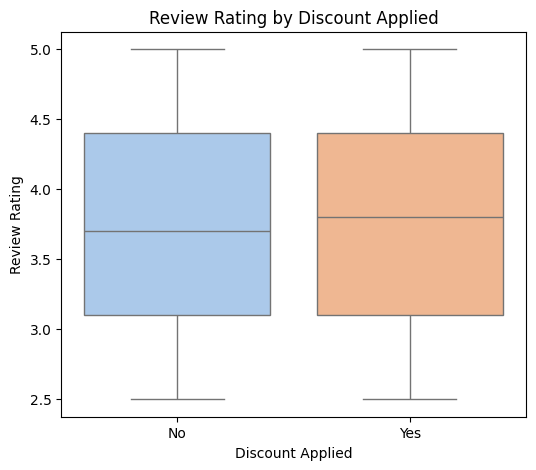

In [19]:
plt.figure(figsize=(6, 5))
sns.boxplot(x='Discount_Applied', y='Review_Rating', data=df, palette='pastel')
plt.title('Review Rating by Discount Applied')
plt.xlabel('Discount Applied')
plt.ylabel('Review Rating')
plt.xticks([0, 1], ['No', 'Yes'])
plt.show()

In [20]:
df.groupby('Discount_Applied')['Review_Rating'].mean()

Discount_Applied
No     3.757715
Yes    3.739654
Name: Review_Rating, dtype: float64

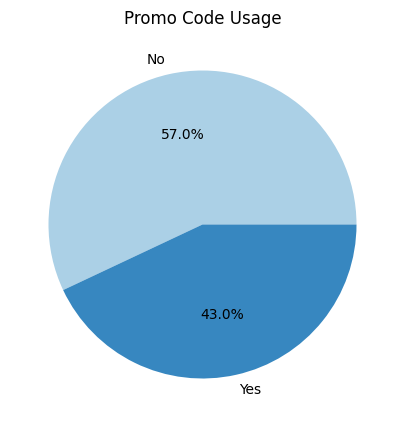

In [21]:
promo_usage = df['Promo_Code_Used'].value_counts()

plt.figure(figsize=(5,5))
promo_usage.plot.pie(autopct='%1.1f%%', colors=sns.color_palette("Blues", 2), labels=['No', 'Yes'])
plt.title('Promo Code Usage')
plt.ylabel('')
plt.show()

In [22]:
df['Review_Rating'].unique()

array([3.0999999 , 3.5       , 2.70000005, 2.9000001 , 3.20000005,
       2.5999999 , 4.80000019, 4.0999999 , 4.9000001 , 4.5       ,
       4.69999981, 2.79999995, 4.5999999 , 3.29999995, 4.4000001 ,
       3.5999999 , 5.        , 4.        , 3.70000005, 4.19999981,
       3.9000001 , 3.        , 3.79999995, 3.4000001 , 4.30000019,
       2.5       ])

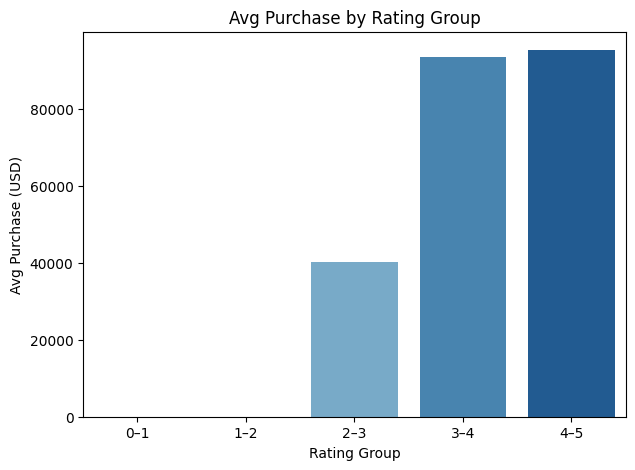

In [23]:
bins = [0, 1, 2, 3, 4, 5]
labels = ['0–1', '1–2', '2–3', '3–4', '4–5']

df['Rating_Group'] = pd.cut(df['Review_Rating'], bins=bins, labels=labels, right=False)

rating_avg_grouped = df.groupby('Rating_Group')['Purchase_Amount_USD'].sum().reset_index()

plt.figure(figsize=(7,5))
sns.barplot(data=rating_avg_grouped, x='Rating_Group', y='Purchase_Amount_USD', palette=sns.color_palette("Blues", len(rating_avg_grouped)))
plt.title('Avg Purchase by Rating Group')
plt.xlabel('Rating Group')
plt.ylabel('Avg Purchase (USD)')
plt.show()

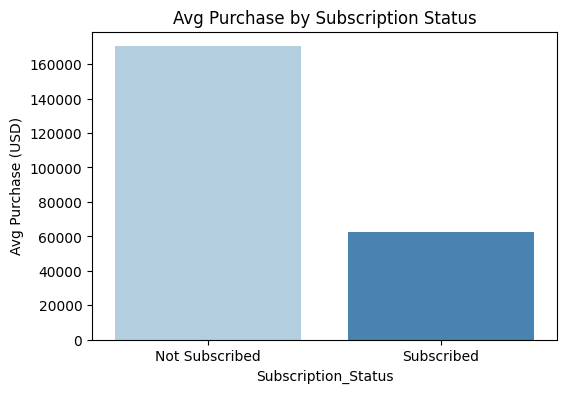

In [24]:
sub_effect = df.groupby('Subscription_Status')['Purchase_Amount_USD'].sum().reset_index()

plt.figure(figsize=(6,4))
sns.barplot(data=sub_effect, x='Subscription_Status', y='Purchase_Amount_USD', palette=sns.color_palette("Blues", len(sub_effect)))
plt.title('Avg Purchase by Subscription Status')
plt.xticks([0, 1], ['Not Subscribed', 'Subscribed'])
plt.ylabel('Avg Purchase (USD)')
plt.show()

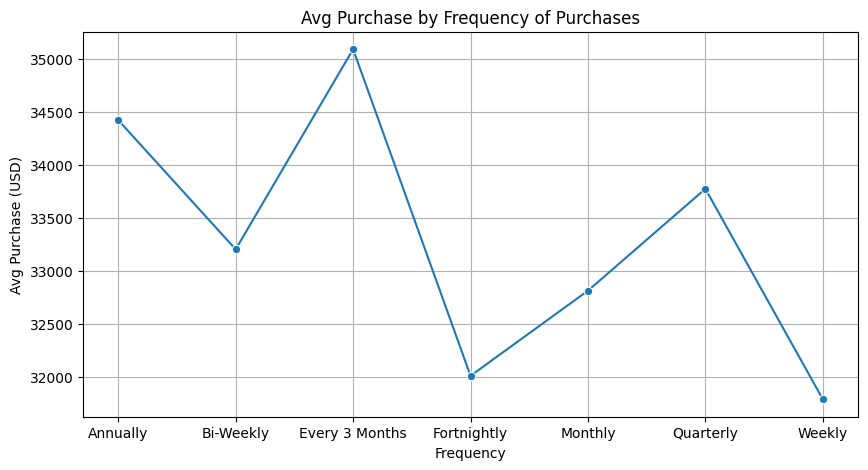

In [25]:
freq_avg = df.groupby('Frequency_of_Purchases')['Purchase_Amount_USD'].sum().reset_index()

plt.figure(figsize=(10,5))
sns.lineplot(data=freq_avg, x='Frequency_of_Purchases', y='Purchase_Amount_USD', marker='o', color='#1f77b4')
plt.title('Avg Purchase by Frequency of Purchases')
plt.xlabel('Frequency')
plt.ylabel('Avg Purchase (USD)')
plt.grid(True)
plt.show()

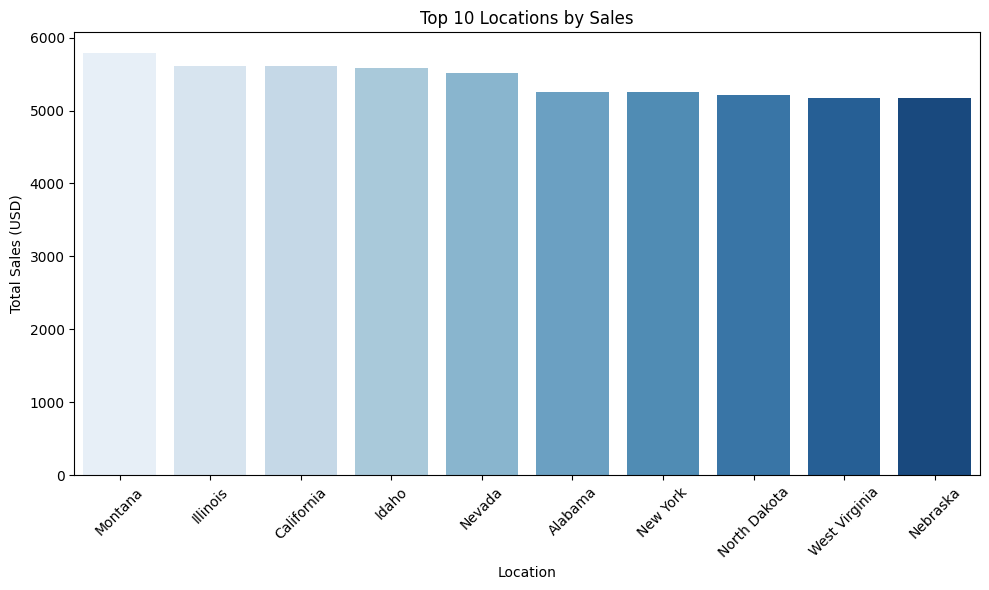

In [26]:
location_sales = df.groupby('Location')['Purchase_Amount_USD'].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(10,6))
sns.barplot(x=location_sales.index, y=location_sales.values, palette=sns.color_palette("Blues", len(location_sales)))
plt.title('Top 10 Locations by Sales')
plt.ylabel('Total Sales (USD)')
plt.xlabel('Location')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

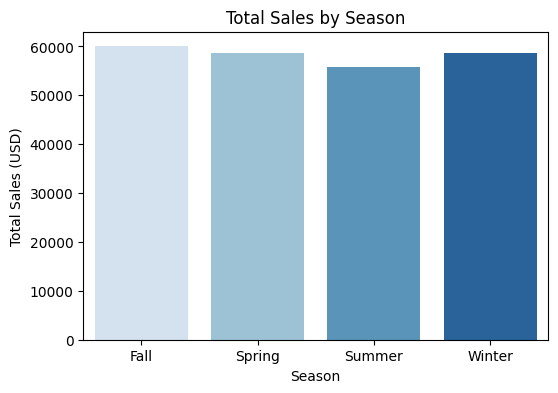

In [27]:
season_sales = df.groupby('Season')['Purchase_Amount_USD'].sum().reset_index()

plt.figure(figsize=(6,4))
sns.barplot(data=season_sales, x='Season', y='Purchase_Amount_USD', palette=sns.color_palette("Blues", len(season_sales)))
plt.title('Total Sales by Season')
plt.ylabel('Total Sales (USD)')
plt.xlabel('Season')
plt.show()

In [28]:
total_sales = df['Purchase_Amount_USD'].sum()
total_customers = df['Customer_ID'].nunique()
average_order = df['Purchase_Amount_USD'].mean()
promo_code_usage = df['Promo_Code_Used'].value_counts(normalize=True).get(1, 0) * 100
subscription_rate = df['Subscription_Status'].value_counts(normalize=True).get(1, 0) * 100

print("📊 KEY PERFORMANCE INDICATORS (KPIs)")
print("-" * 40)
print(f"🧾 Total Sales:              ${total_sales:,.2f}")
print(f"👥 Total Customers:         {total_customers}")
print(f"🛍️ Average Order Value:     ${average_order:,.2f}")
print(f"🎯 Promo Code Usage Rate:   {promo_code_usage:.2f}%")
print(f"📬 Subscription Rate:       {subscription_rate:.2f}%")

📊 KEY PERFORMANCE INDICATORS (KPIs)
----------------------------------------
🧾 Total Sales:              $233,081.00
👥 Total Customers:         3900
🛍️ Average Order Value:     $59.76
🎯 Promo Code Usage Rate:   43.00%
📬 Subscription Rate:       27.00%
